# Lab 3: Training Deep Recurrent Neural Network


## Lab Instruction - Emojify

In this lab, you will learn to train a deep Recurrent neural network using Keras library with Tensorflow backend. Your task is to do the sentimental analysis which you will predict the emoji that represent the emotion in each sentence.


In [ ]:
# Import require library
from keras import *
from keras.preprocessing import text
from keras.preprocessing import sequence


In [21]:
pip install --user pip-utils

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [23]:
from sklearn.model_selection import train_test_split

import _utils as fn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: ignored

### Read data

In [ ]:
# import data
df = pd.read_csv('/content/emoji_data.csv')
df.describe()

,emoji
count,7480.000000
mean,2.977273
std,1.999269
min,0.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,6.000000


In [ ]:
df.head()

,sentence,emoji
0,"During the period of falling in love, each tim...",0
1,When I was involved in a traffic accident.,1
2,When I was driving home after several days of...,2
3,When I lost the person who meant the most to me.,3
4,The time I knocked a deer down - the sight of ...,4


In [ ]:
x = df['sentence'].values
y = df['emoji'].values

In [ ]:
x[0]

'During the period of falling in love, each time that we met and especially when we had not met for a long time.'

In [ ]:
y[0]

0

### Split train test

In [ ]:
# Split train test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.1,stratify=y,random_state=0)
# Split train validate
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size =0.1,stratify=y,random_state=0)

Text(0.5, 1.0, 'y val')

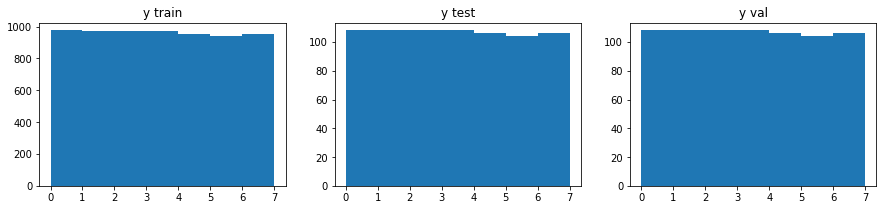

In [ ]:
# Plot target distribution
fig,ax =plt.subplots(1,3,figsize=(15,3))

bins = [0,1,2,3,4,5,6,7]

ax[0].hist(y_train,bins=bins)
ax[0].set_title('y train')
ax[1].hist(y_test,bins=bins)
ax[1].set_title('y test')
ax[2].hist(y_val,bins=bins)
ax[2].set_title('y val')

### Preprocess data: Tokenizer & Padding

In [ ]:
# Define parameter
max_word = 5000 #(คลังคำศัพท์)
maxlen = 20
max_features = 5000

In [ ]:
# Define Tokenizer แปลงข้อมูล text เป็นตัวเลข
tokenizer = text.Tokenizer(num_words = max_word) #define corpus(คลังคำศัพท์)  to keep maximum number of words 
tokenizer.fit_on_texts(x_train)

In [ ]:
tokenizer.word_index

{'i': 1,
 'the': 2,
 'a': 3,
 'to': 4,
 'my': 5,
 'and': 6,
 'was': 7,
 'when': 8,
 'of': 9,
 'in': 10,
 'had': 11,
 'me': 12,
 'that': 13,
 'for': 14,
 'not': 15,
 'with': 16,
 'it': 17,
 'at': 18,
 'on': 19,
 'he': 20,
 'very': 21,
 'friend': 22,
 'felt': 23,
 'an': 24,
 'she': 25,
 'her': 26,
 'we': 27,
 'one': 28,
 'as': 29,
 'about': 30,
 'this': 31,
 'from': 32,
 'after': 33,
 'time': 34,
 'by': 35,
 'were': 36,
 'did': 37,
 'but': 38,
 'out': 39,
 'him': 40,
 'who': 41,
 'because': 42,
 'his': 43,
 'been': 44,
 'got': 45,
 'have': 46,
 'some': 47,
 'which': 48,
 'home': 49,
 'would': 50,
 'friends': 51,
 'up': 52,
 'told': 53,
 'so': 54,
 'day': 55,
 'mother': 56,
 'they': 57,
 'be': 58,
 'do': 59,
 'school': 60,
 'people': 61,
 'went': 62,
 'person': 63,
 'there': 64,
 'saw': 65,
 'our': 66,
 'first': 67,
 'is': 68,
 'could': 69,
 'came': 70,
 'night': 71,
 'father': 72,
 'go': 73,
 'all': 74,
 "didn't": 75,
 'made': 76,
 'mine': 77,
 'girl': 78,
 'having': 79,
 'back': 80,
 'o

In [ ]:
tokenizer.num_words

5000

In [ ]:
# Preprocess data function ทำให้ความยาวประโยคมีความยาวเท่าๆกัน ใช้ .pad_sequences และ 1 ประโยคควรมีความยาวเท่าไหร่ ใช้ maxlen
def preprocess_fn(data):
    sequeces = tokenizer.texts_to_sequences(data)
    padding_sequences = sequence.pad_sequences(sequeces,maxlen = maxlen)
    
    return padding_sequences,sequeces

In [ ]:
# Preprocess data
x_train,sequeces_x_train =  preprocess_fn(x_train)
x_val,sequeces_x_val = preprocess_fn(x_val)
x_test,sequeces_x_test = preprocess_fn(x_test)

In [ ]:
x_train

array([[ 338,    4,  719, ...,    6, 1529,   93],
       [   0,    0,    0, ...,  408,    4,   12],
       [   4,  345,    3, ...,   11,  172,  173],
       ...,
       [   0,    0,    0, ...,  127,    5,   22],
       [   0,    0,    0, ...,   86, 1403,   12],
       [  14,   40,    4, ...,  981,    4,   12]], dtype=int32)

In [ ]:
sequeces_x_train
#แปลงคำภาษาอังกฤษออกมาเป็นตัวเลข

[[188,
  9,
  3,
  1406,
  3199,
  27,
  11,
  4,
  221,
  17,
  107,
  42,
  5,
  100,
  240,
  2584,
  4,
  17,
  27,
  202,
  17,
  4,
  3,
  98,
  41,
  402,
  784,
  6,
  1528,
  9,
  81,
  784,
  14,
  338,
  4,
  719,
  27,
  62,
  4,
  345,
  66,
  3199,
  17,
  7,
  314,
  561,
  35,
  2,
  81,
  4453,
  6,
  1529,
  93],
 [1, 46, 23, 31, 161, 8, 3, 63, 164, 1, 661, 6, 720, 408, 4, 12],
 [304,
  18,
  321,
  87,
  721,
  4,
  345,
  3,
  96,
  456,
  10,
  242,
  33,
  26,
  188,
  1,
  23,
  21,
  111,
  6,
  1204,
  1,
  11,
  172,
  173],
 [1,
  688,
  4,
  5,
  56,
  19,
  2,
  507,
  25,
  11,
  1663,
  508,
  6,
  7,
  382,
  4,
  58,
  2162,
  1,
  374,
  4,
  578,
  26,
  2,
  633,
  9,
  2,
  579,
  6,
  133,
  130,
  2163,
  66,
  562,
  25,
  202,
  12,
  2,
  633,
  10,
  722],
 [8,
  4454,
  16,
  3200,
  457,
  1664,
  114,
  5,
  121,
  6,
  1882,
  12,
  4,
  221,
  88,
  152,
  103,
  383,
  188],
 [45, 220, 67, 1142, 143],
 [8,
  1,
  458,
  13,
  1,
  11,
  

### Build a model with word embedding

In [ ]:
# Define model
rnn =models.Sequential()
rnn.add(layers.Embedding(max_features,32,input_length=maxlen))
#ขนาด output = 32

rnn.add(layers.SimpleRNN(32))
rnn.add(layers.Dense(64,activation='elu')) #fully connected
rnn.add(layers.Dense(7,activation='softmax')) #output layer

In [ ]:
# Compile model
rnn.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [ ]:
# Show model structure
rnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 20, 32)            160000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 7)                 455       
Total params: 164,647
Trainable params: 164,647
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Define callbacks


In [ ]:
# Fit model
his =  rnn.fit(x_train,y_train,epochs=5,batch_size=32,validation_data=(x_val,y_val))

Train on 6732 samples, validate on 748 samples
Epoch 1/5
6732/6732 [==============================] - 5s 814us/step - loss: 1.8759 - acc: 0.2078 - val_loss: 1.9486 - val_acc: 0.2233
Epoch 2/5
6732/6732 [==============================] - 5s 704us/step - loss: 1.5692 - acc: 0.3945 - val_loss: 1.5943 - val_acc: 0.3783
Epoch 3/5
6732/6732 [==============================] - 5s 707us/step - loss: 1.2431 - acc: 0.5557 - val_loss: 1.5684 - val_acc: 0.4064
Epoch 4/5
6732/6732 [==============================] - 5s 698us/step - loss: 0.9488 - acc: 0.6774 - val_loss: 1.7678 - val_acc: 0.3837
Epoch 5/5
6732/6732 [==============================] - 5s 705us/step - loss: 0.7124 - acc: 0.7754 - val_loss: 1.8043 - val_acc: 0.4345


Last train accuracy: 0.7754010694833009
Last validation accuracy: 0.43449197845025495


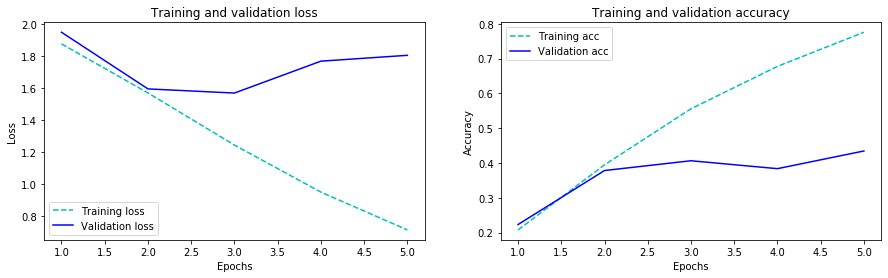

In [ ]:

# Plot accuracy and loss over each epochs
fn.show_result(his)
#เกิดปัญหา overfit ถ้าดุจากกราฟที่ออกมา

###LSTM

In [24]:
# Define model
lstm =models.Sequential()
lstm.add(layers.Embedding(max_features,32,input_length=maxlen))

lstm.add(layers.LSTM(32))
lstm.add(layers.Dense(64,activation='elu'))
lstm.add(layers.Dense(7,activation='softmax'))

NameError: ignored

In [ ]:
# Compile model
lstm.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [ ]:
# Fit model
his2 =  lstm.fit(x_train,y_train,epochs=5,batch_size=32,validation_data=(x_val,y_val))

### Evaluate Model
Baseline of the model is 14.28% (Random prediction)

In [ ]:
# Preprocess test data
rnn.evaluate(x_test,y_test)

748/748 [==============================] - 0s 466us/step


[1.804313856012681, 0.43449197845025495]

In [ ]:
# Evaluate model with test data

In [ ]:
# Show confusino matrix and prediction report
fn.evaluation_report(rnn,x_test,y_test)

[[53  6  5 28  1 10  5]
 [ 8 54 13 10 13  6  4]
 [ 4  7 44  4 10 27 12]
 [ 4  3  5 65  5 19  7]
 [ 5 14 24  5 39 13  6]
 [ 5  3 28 11 11 30 16]
 [ 3  3 21 14  4 22 39]]
              precision    recall  f1-score   support

           0       0.65      0.49      0.56       108
           1       0.60      0.50      0.55       108
           2       0.31      0.41      0.35       108
           3       0.47      0.60      0.53       108
           4       0.47      0.37      0.41       106
           5       0.24      0.29      0.26       104
           6       0.44      0.37      0.40       106

    accuracy                           0.43       748
   macro avg       0.45      0.43      0.44       748
weighted avg       0.46      0.43      0.44       748

Loss: 1.8833339360946002 Accuracy: 0.43315507989516233


array([1, 6, 3, 2, 2, 3, 3, 6, 3, 2, 2, 3, 3, 2, 2, 2, 5, 2, 4, 6, 4, 1,
       4, 6, 3, 1, 3, 1, 2, 2, 3, 2, 2, 4, 3, 3, 6, 2, 5, 0, 0, 4, 3, 0,
       4, 6, 3, 3, 3, 3, 3, 0, 1, 3, 5, 5, 5, 1, 6, 5, 0, 1, 3, 3, 3, 6,
       5, 5, 3, 3, 4, 4, 1, 0, 4, 2, 2, 3, 5, 2, 2, 6, 5, 0, 6, 6, 5, 2,
       2, 6, 3, 1, 2, 2, 3, 0, 3, 3, 2, 2, 2, 6, 2, 5, 5, 4, 0, 3, 0, 3,
       1, 4, 5, 6, 0, 1, 1, 2, 3, 5, 1, 5, 5, 2, 2, 2, 1, 0, 5, 3, 5, 4,
       4, 5, 4, 0, 1, 4, 2, 4, 3, 0, 6, 3, 0, 5, 2, 5, 3, 1, 1, 0, 5, 1,
       0, 1, 0, 5, 1, 5, 5, 5, 4, 1, 6, 3, 5, 6, 2, 3, 1, 3, 4, 0, 3, 5,
       4, 5, 1, 4, 2, 3, 5, 5, 3, 4, 0, 5, 4, 5, 3, 1, 3, 3, 3, 6, 2, 0,
       2, 4, 6, 1, 2, 0, 5, 2, 6, 2, 1, 5, 3, 0, 6, 0, 2, 3, 3, 4, 6, 5,
       0, 1, 2, 1, 2, 2, 4, 3, 5, 4, 2, 3, 5, 0, 1, 5, 2, 6, 6, 5, 6, 2,
       3, 4, 5, 2, 0, 1, 5, 4, 5, 4, 2, 2, 3, 5, 2, 4, 3, 2, 1, 0, 3, 6,
       5, 1, 5, 3, 3, 2, 4, 0, 2, 3, 2, 6, 1, 6, 3, 5, 2, 0, 1, 5, 6, 4,
       2, 2, 6, 6, 6, 2, 1, 2, 0, 5, 2, 5, 4, 1, 6,

In [ ]:
rnn.save('model1.h5')

In [ ]:
# Preprocess test data
lstm.evaluate(x_test,y_test)

748/748 [==============================] - 0s 575us/step


[1.5295312774372611, 0.4973262028898147]

In [ ]:
# Show confusino matrix and prediction report
fn.evaluation_report(lstm,x_test,y_test)

[[69 13  7  7  1  9  2]
 [ 2 69  8  4  8 16  1]
 [ 3  8 55  3 15 17  7]
 [10  7 20 54  6  8  3]
 [ 1 14 25  1 49 15  1]
 [ 6 11 25  4  3 52  3]
 [ 5  4 36  6  2 29 24]]
              precision    recall  f1-score   support

           0       0.72      0.64      0.68       108
           1       0.55      0.64      0.59       108
           2       0.31      0.51      0.39       108
           3       0.68      0.50      0.58       108
           4       0.58      0.46      0.52       106
           5       0.36      0.50      0.42       104
           6       0.59      0.23      0.33       106

    accuracy                           0.50       748
   macro avg       0.54      0.50      0.50       748
weighted avg       0.54      0.50      0.50       748

Loss: 1.5295312774372611 Accuracy: 0.4973262028898147


array([1, 6, 2, 2, 2, 3, 0, 4, 4, 5, 4, 3, 3, 4, 5, 1, 2, 2, 2, 6, 4, 0,
       4, 6, 3, 4, 3, 1, 6, 2, 3, 2, 5, 4, 5, 0, 6, 2, 5, 1, 0, 2, 5, 5,
       4, 2, 3, 3, 3, 3, 0, 0, 1, 0, 5, 5, 3, 4, 3, 6, 0, 1, 0, 0, 0, 6,
       2, 2, 1, 0, 4, 4, 1, 0, 2, 4, 2, 3, 6, 2, 2, 2, 2, 3, 5, 5, 0, 2,
       2, 2, 5, 1, 5, 2, 0, 1, 1, 3, 5, 5, 2, 4, 1, 2, 5, 1, 5, 0, 0, 3,
       5, 5, 0, 5, 0, 1, 5, 2, 0, 2, 1, 5, 5, 1, 4, 1, 1, 3, 2, 4, 2, 5,
       3, 2, 1, 0, 4, 2, 4, 5, 0, 1, 2, 2, 5, 2, 5, 5, 3, 1, 2, 1, 2, 1,
       0, 1, 1, 5, 4, 2, 2, 5, 1, 1, 3, 3, 2, 1, 2, 3, 1, 0, 1, 0, 0, 2,
       2, 2, 1, 4, 2, 5, 1, 5, 0, 5, 0, 6, 5, 3, 0, 1, 3, 3, 0, 5, 2, 4,
       4, 2, 2, 4, 5, 1, 5, 5, 5, 2, 1, 5, 0, 2, 3, 0, 5, 3, 3, 2, 4, 5,
       1, 4, 4, 1, 2, 2, 4, 0, 2, 4, 2, 0, 5, 0, 1, 2, 5, 5, 2, 1, 6, 5,
       0, 4, 2, 2, 0, 1, 2, 5, 5, 1, 2, 6, 3, 5, 4, 4, 3, 2, 4, 0, 3, 2,
       2, 4, 5, 5, 6, 5, 4, 5, 2, 5, 2, 5, 1, 2, 3, 3, 2, 0, 1, 4, 5, 3,
       5, 2, 5, 0, 2, 4, 0, 5, 0, 5, 2, 5, 5, 1, 6,

In [ ]:
lstm.save('model2.h5')

# ### Play with your model
**Emoji**
0 = joy 😆
1 = fear 😱
2 = anger 😡
3 = sadness 😭
4 = disgust 🤮
5 = shame 😳
6 = guilt 😞

In [ ]:
# Define predict function
def predict_emoji(input_text,model):
    
    prepro_input = preprocess_fn([input_text])
    prepro_input = prepro_input[0]
    pred_class = model.predict(prepro_input).argmax(axis =1)
    
    label_to_emoji = ['😆','😱','😡','😭','🤮','😳','😞']
    
    result = label_to_emoji[int(pred_class)]
    
    print('%s %s'%(input_text,result))

In [ ]:
# Test your model
input_text ='I like this class'
predict_emoji(input_text,rnn)

I like this class 😳


In [ ]:
# Test your model
input_text = 'I like this class'
predict_emoji(input_text,lstm)

I like this class 😱
